In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import load_checkpoint, cnn_test_step, mmn_test_step
import pandas as pd
from dataloader import CustomDataloader
from networks import CNNRegression, MultiModalNetwork
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Model 1 - Linear Regression Analysis

In [21]:

#load pkl files and plot the data
regression_theta = torch.load('tensor_collection\\lr_theta.pt').numpy()
regression_train_loss = torch.load('tensor_collection\\lr_train_loss.pt')
regression_val_loss = torch.load('tensor_collection\\lr_val_loss.pt')
cm_x_test = torch.load('tensor_collection\\cm_x_test.pt')
cm_y_test = torch.load('tensor_collection\\cm_y_test.pt')


Final training loss: 67.55097198486328
Final validation loss: 63.5295524597168


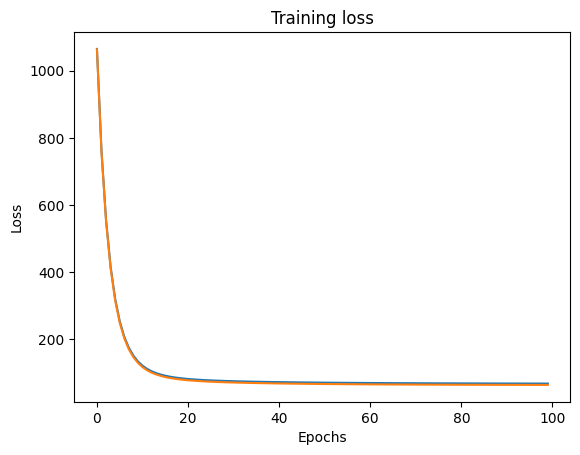

In [22]:
# plot the losses over time
plt.figure(0)
plt.plot(regression_train_loss)
plt.plot(regression_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', regression_train_loss[-1].item())
print('Final validation loss:', regression_val_loss[-1].item())

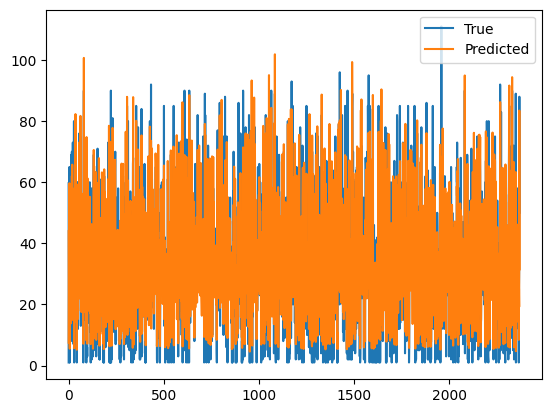

In [23]:
cm_y_hat = cm_x_test @ regression_theta

plt.figure()
plt.plot(cm_y_test)
plt.plot(cm_y_hat)
plt.legend(['True', 'Predicted'])

In [24]:

predictions = np.array(cm_y_hat)
actuals = np.array(cm_y_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')





MSE: 65.50593348912939
RMSE: 8.093573592000594
MAE: 6.110155010236515
R-Squared: 0.8341811044083984


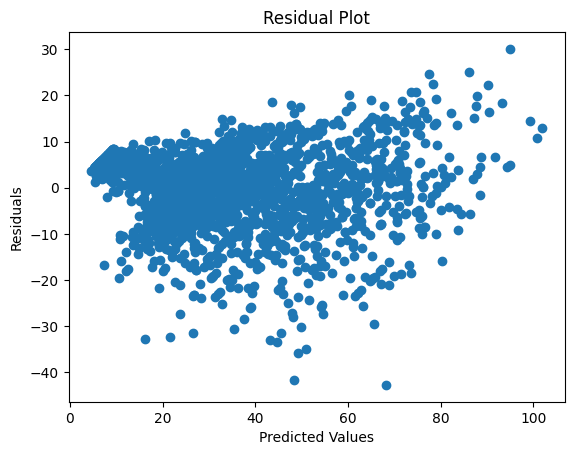

In [25]:
#Residual Plot
plt.figure(2)
plt.scatter(cm_y_hat, cm_y_hat-cm_y_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Model 2 - Convolutional Neural Network Analysis

In [26]:
cnn_train_loss = torch.load('tensor_collection\\cnn_train_losses.pt')
cnn_val_loss = torch.load('tensor_collection\\cnn_val_losses.pt')


Final training loss: 179.44630363865903
Final validation loss: 190.37682469685873


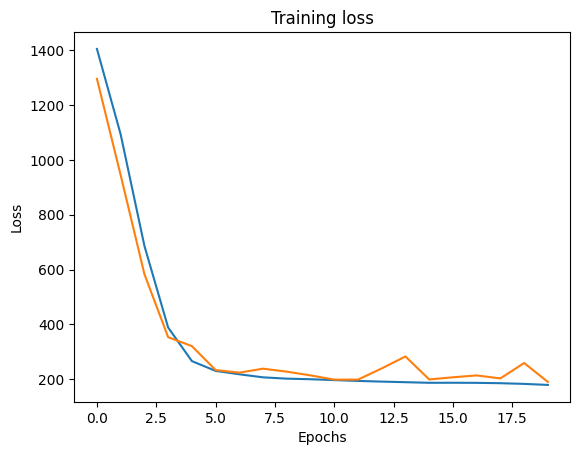

In [27]:
# plot the losses over time
plt.figure(3)
plt.plot(cnn_train_loss)
plt.plot(cnn_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', cnn_train_loss[-1])
print('Final validation loss:', cnn_val_loss[-1])

In [28]:
directory = 'tensor_collection\\'

#load test  files
cnn_x_test = pd.read_csv(directory + 'cnn_x_test.csv')
cnn_y_test_tensor = torch.load(directory + 'cnn_y_test.pt')

print(type(cnn_x_test))
print(type(cnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_cnn = CNNRegression().to(device)

model_cnn, epochs = load_checkpoint('model_checkpoints\\cnn_checkpoint_final.pth', model_cnn)

batch_sz = 64

In [30]:
test_cnn_dataloader = CustomDataloader(dataframe=cnn_x_test, age=cnn_y_test_tensor, batch_size=batch_sz, randomize=False)

In [31]:
model_cnn.eval()  # Set the model to evaluation mode

predictions = []
actuals = []

predictions, actuals = cnn_test_step(model_cnn, test_cnn_dataloader, device)


In [32]:
# Converting lists to numpy arrays for calculation
predictions = np.array(predictions)
actuals = np.array(actuals)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')

MSE: 174.04067993164062
RMSE: 13.192447662353516
MAE: 10.220416069030762
R-Squared: 0.559440936726991


# Model 3 - Multi Modal Neural Network - Analysis

In [33]:
mnn_train_loss = torch.load('tensor_collection\\mmn_train_losses.pt')
mnn_val_loss = torch.load('tensor_collection\\mmn_val_losses.pt')

Final training loss: 75.70376113088507
Final validation loss: 75.23978805541992


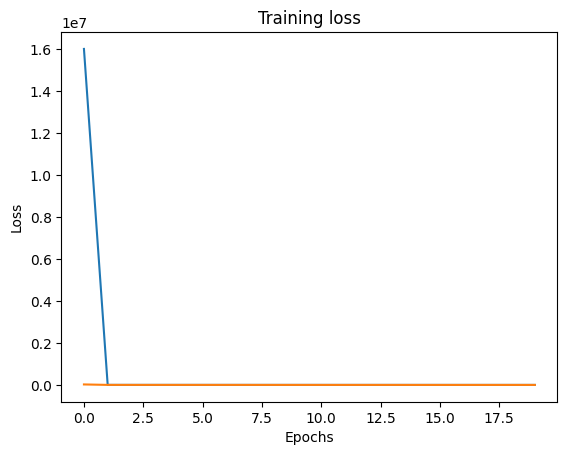

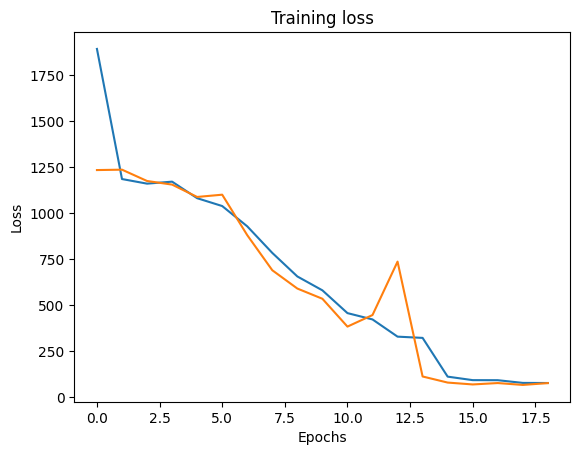

In [34]:
plt.figure(4)
plt.plot(mnn_train_loss)
plt.plot(mnn_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot the losses over time
plt.figure(5)
plt.plot(mnn_train_loss[1:])
plt.plot(mnn_val_loss[1:])
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', mnn_train_loss[-1])
print('Final validation loss:', mnn_val_loss[-1])

In [35]:
directory = 'tensor_collection\\'

#load test  files
mnn_x_test = pd.read_csv(directory + 'mnn_x_test.csv')
mnn_y_test_tensor = torch.load(directory + 'mnn_y_test.pt')

print(type(mnn_x_test))
print(type(mnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_numerical_features = mnn_x_test.shape[1] - 1 # -1 because we don't count the filename column

model_mnn = MultiModalNetwork(num_numerical_features).to(device)

model_mnn, epochs = load_checkpoint('model_checkpoints\\mmn_checkpoint_final.pth', model_mnn)

batch_sz = 64

In [37]:
test_mnn_dataloader = CustomDataloader(dataframe=mnn_x_test, age=mnn_y_test_tensor, batch_size=batch_sz, randomize=False)

In [38]:
model_mnn.eval()  # Set the model to evaluation mode

predictions = []
actuals = []

predictions, actuals = predictions, actuals = mmn_test_step(model_mnn, test_mnn_dataloader, device)


In [39]:
# Converting lists to numpy arrays for calculation
predictions = np.array(predictions)
actuals = np.array(actuals)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')

MSE: 70.76361846923828
RMSE: 8.412111282348633
MAE: 5.9640398025512695
R-Squared: 0.8208720166538782
